In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mpl
import seaborn as sb
import warnings

In [2]:
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("/content/Car_Insurance_Claim.csv")

In [4]:
df.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [5]:
df.tail()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
9995,323164,26-39,female,majority,10-19y,university,upper class,0.582787,1.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,1,0.0
9996,910346,26-39,female,majority,10-19y,none,middle class,0.522231,1.0,after 2015,0.0,1.0,32765,NaN,sedan,1,0,0,0.0
9997,468409,26-39,male,majority,0-9y,high school,middle class,0.470940,1.0,before 2015,0.0,1.0,10238,14000.0,sedan,0,0,0,0.0
9998,903459,26-39,female,majority,10-19y,high school,poverty,0.364185,0.0,before 2015,0.0,1.0,10238,13000.0,sedan,2,0,1,1.0
9999,442696,26-39,female,majority,0-9y,none,working class,0.435225,1.0,before 2015,1.0,1.0,10238,13000.0,sedan,0,0,0,0.0


In [6]:
df.shape

(10000, 19)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

In [8]:
df.isnull().sum().sort_values(ascending = False)

CREDIT_SCORE           982
ANNUAL_MILEAGE         957
ID                       0
MARRIED                  0
PAST_ACCIDENTS           0
DUIS                     0
SPEEDING_VIOLATIONS      0
VEHICLE_TYPE             0
POSTAL_CODE              0
CHILDREN                 0
VEHICLE_YEAR             0
AGE                      0
VEHICLE_OWNERSHIP        0
INCOME                   0
EDUCATION                0
DRIVING_EXPERIENCE       0
RACE                     0
GENDER                   0
OUTCOME                  0
dtype: int64

In [9]:
#null values in percentage
(df.isnull().sum().sort_values(ascending = False))/df.shape[0]*100

CREDIT_SCORE           9.82
ANNUAL_MILEAGE         9.57
ID                     0.00
MARRIED                0.00
PAST_ACCIDENTS         0.00
DUIS                   0.00
SPEEDING_VIOLATIONS    0.00
VEHICLE_TYPE           0.00
POSTAL_CODE            0.00
CHILDREN               0.00
VEHICLE_YEAR           0.00
AGE                    0.00
VEHICLE_OWNERSHIP      0.00
INCOME                 0.00
EDUCATION              0.00
DRIVING_EXPERIENCE     0.00
RACE                   0.00
GENDER                 0.00
OUTCOME                0.00
dtype: float64

In [10]:
df["ANNUAL_MILEAGE"] = df["ANNUAL_MILEAGE"].fillna(df["ANNUAL_MILEAGE"].mean())

In [11]:
df = df.dropna()

In [12]:
df.isnull().sum().sort_values(ascending = False)

ID                     0
MARRIED                0
PAST_ACCIDENTS         0
DUIS                   0
SPEEDING_VIOLATIONS    0
VEHICLE_TYPE           0
ANNUAL_MILEAGE         0
POSTAL_CODE            0
CHILDREN               0
VEHICLE_YEAR           0
AGE                    0
VEHICLE_OWNERSHIP      0
CREDIT_SCORE           0
INCOME                 0
EDUCATION              0
DRIVING_EXPERIENCE     0
RACE                   0
GENDER                 0
OUTCOME                0
dtype: int64

In [13]:
df.shape

(9018, 19)

In [14]:
df = df.drop(["ID","POSTAL_CODE"],axis = 1)

In [15]:
df.duplicated().sum()

0

In [16]:
df = df.drop_duplicates()

In [17]:
df["OUTCOME"].value_counts()

0.0    6189
1.0    2829
Name: OUTCOME, dtype: int64

In [18]:
df["OUTCOME"] = df["OUTCOME"].astype("int")

In [19]:
df["OUTCOME"].value_counts()

0    6189
1    2829
Name: OUTCOME, dtype: int64

In [20]:
cat_var = []
for i in df.columns:
  if df[i].dtypes == "O":
    cat_var.append(i)
cat_var

['AGE',
 'GENDER',
 'RACE',
 'DRIVING_EXPERIENCE',
 'EDUCATION',
 'INCOME',
 'VEHICLE_YEAR',
 'VEHICLE_TYPE']

In [21]:
for j in cat_var:
  print("Column:-",j)
  print(df[j].value_counts())
  mpl.show()
  print("")
  print("")

Column:- AGE
26-39    2744
40-64    2644
65+      1817
16-25    1813
Name: AGE, dtype: int64


Column:- GENDER
male      4512
female    4506
Name: GENDER, dtype: int64


Column:- RACE
majority    8113
minority     905
Name: RACE, dtype: int64


Column:- DRIVING_EXPERIENCE
0-9y      3193
10-19y    2950
20-29y    1918
30y+       957
Name: DRIVING_EXPERIENCE, dtype: int64


Column:- EDUCATION
high school    3761
university     3546
none           1711
Name: EDUCATION, dtype: int64


Column:- INCOME
upper class      3937
middle class     1927
poverty          1632
working class    1522
Name: INCOME, dtype: int64


Column:- VEHICLE_YEAR
before 2015    6264
after 2015     2754
Name: VEHICLE_YEAR, dtype: int64


Column:- VEHICLE_TYPE
sedan         8590
sports car     428
Name: VEHICLE_TYPE, dtype: int64




Column:- AGE


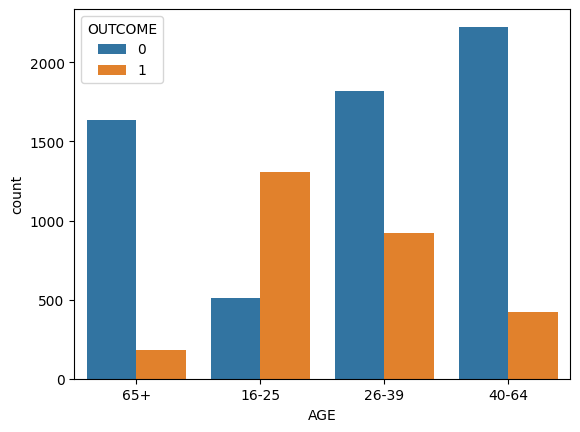



Column:- GENDER


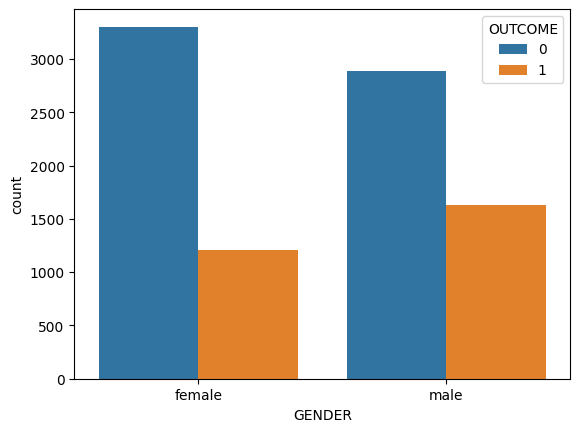



Column:- RACE


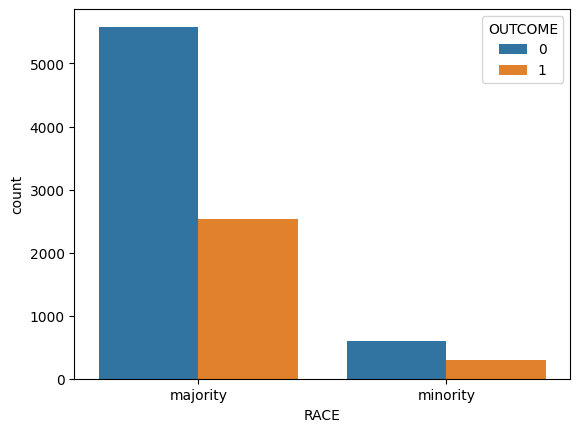



Column:- DRIVING_EXPERIENCE


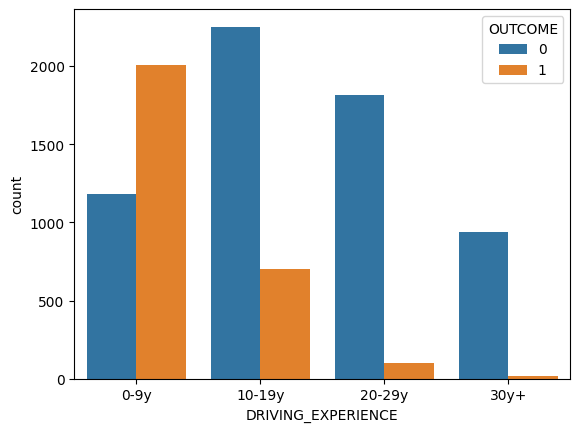



Column:- EDUCATION


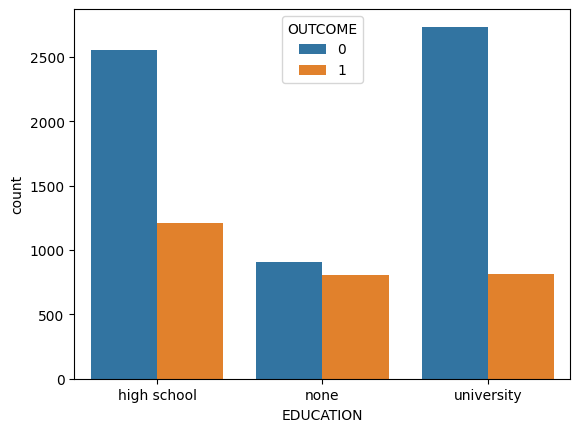



Column:- INCOME


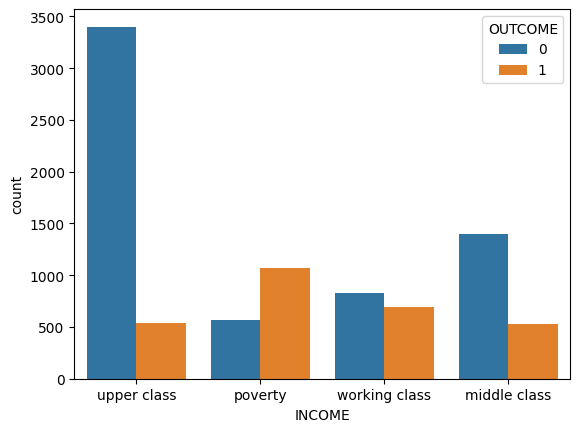



Column:- VEHICLE_YEAR


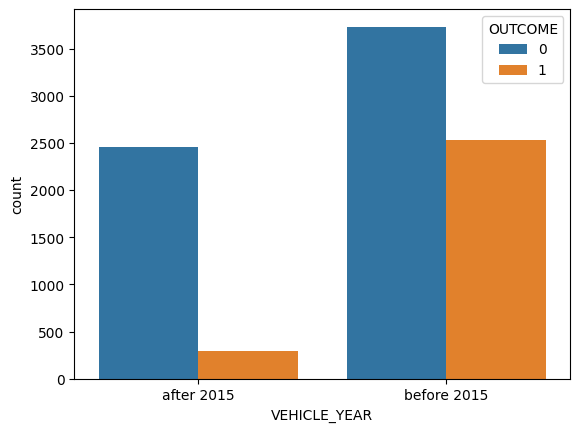



Column:- VEHICLE_TYPE


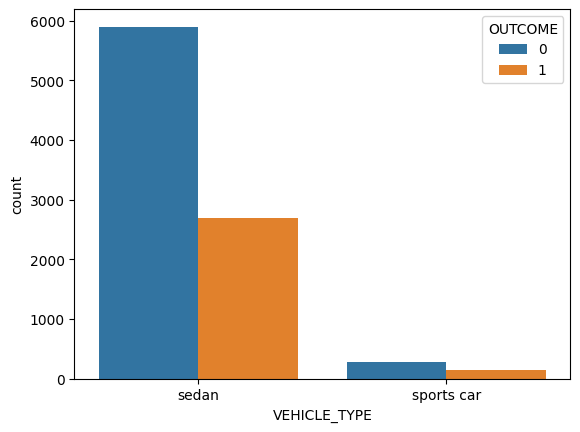

In [22]:
for j in cat_var:
  print("Column:-",j)
  sb.countplot(x = j,data = df,hue = 'OUTCOME')
  mpl.show()
  print("")
  print("")

In [23]:
num_var = []
for k in df.columns:
  if df[k].dtype != 'O':
    num_var.append(k)
num_var

['CREDIT_SCORE',
 'VEHICLE_OWNERSHIP',
 'MARRIED',
 'CHILDREN',
 'ANNUAL_MILEAGE',
 'SPEEDING_VIOLATIONS',
 'DUIS',
 'PAST_ACCIDENTS',
 'OUTCOME']

Column :- CREDIT_SCORE


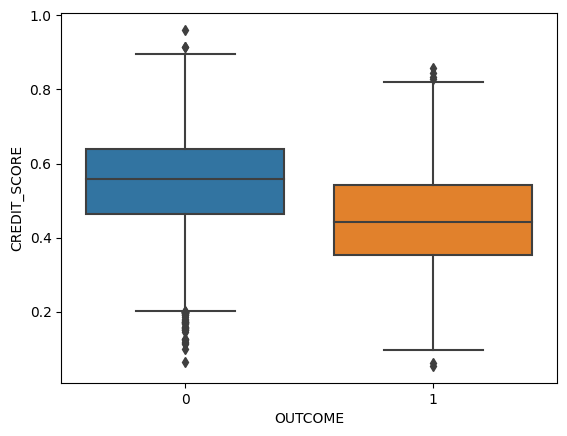


Column :- VEHICLE_OWNERSHIP


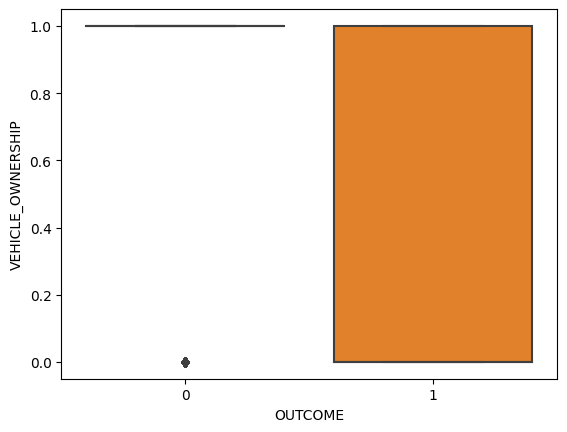


Column :- MARRIED


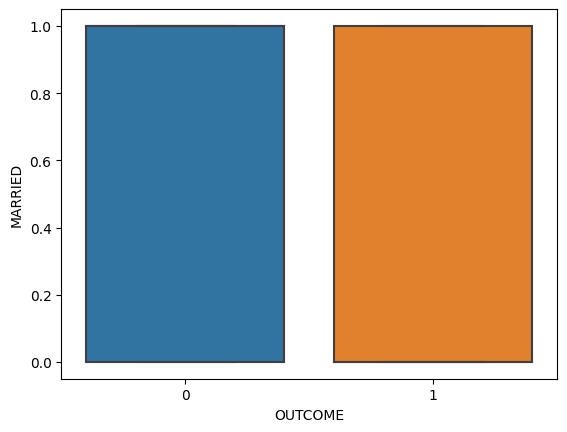


Column :- CHILDREN


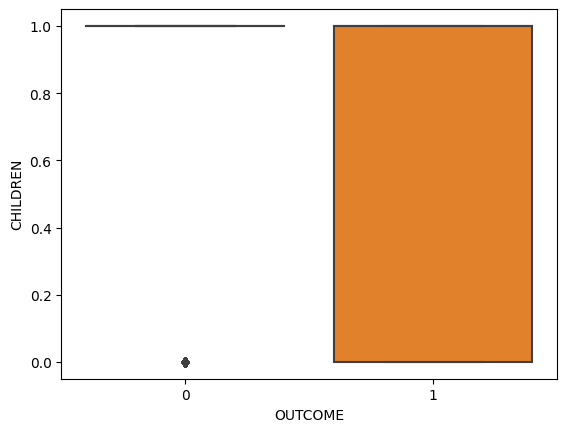


Column :- ANNUAL_MILEAGE


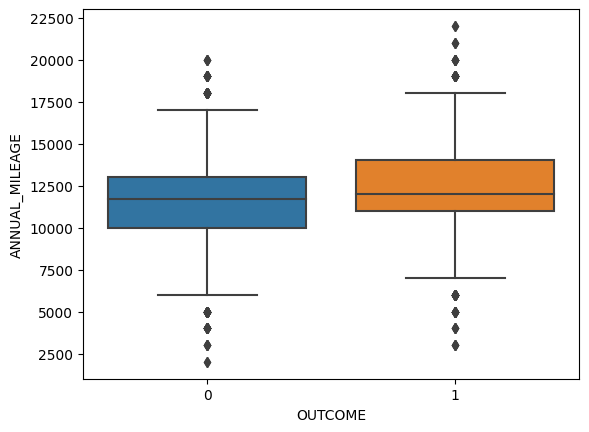


Column :- SPEEDING_VIOLATIONS


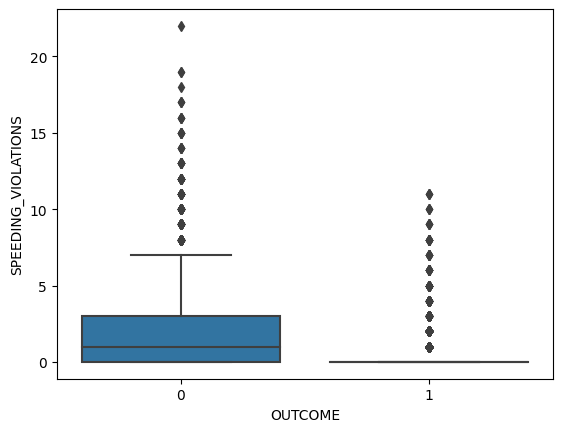


Column :- DUIS


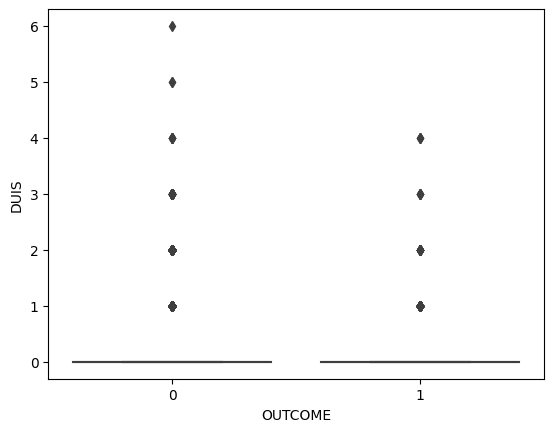


Column :- PAST_ACCIDENTS


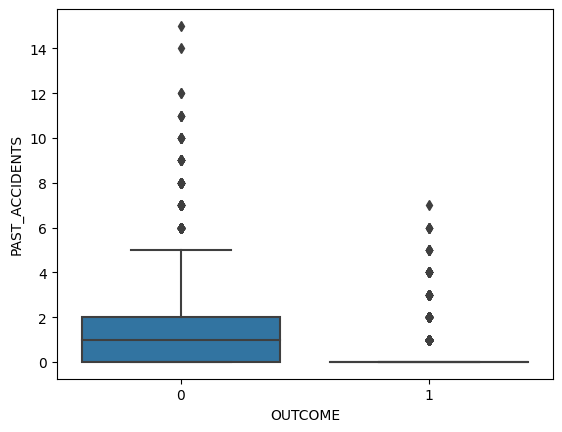


Column :- OUTCOME


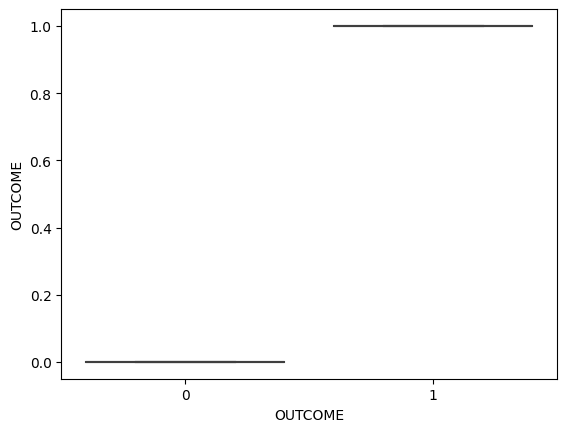

In [24]:
for l in num_var:
  print("Column :-",l)
  sb.boxplot(y= l,x = "OUTCOME",data = df)
  mpl.show()
  print("")

Column :- CREDIT_SCORE


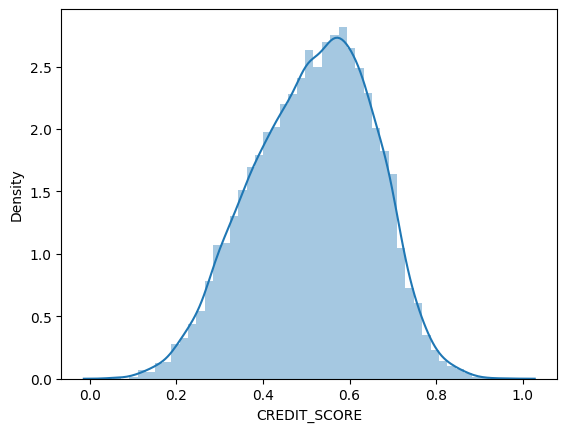


Column :- VEHICLE_OWNERSHIP


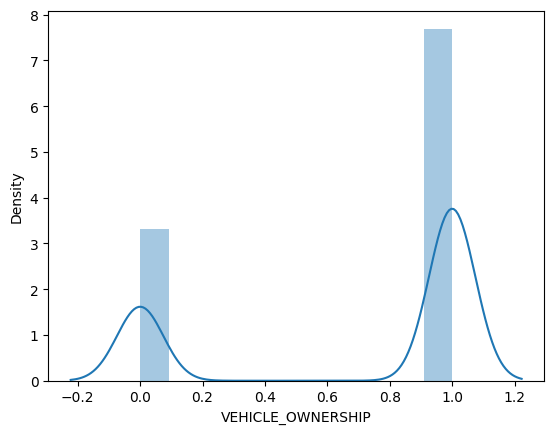


Column :- MARRIED


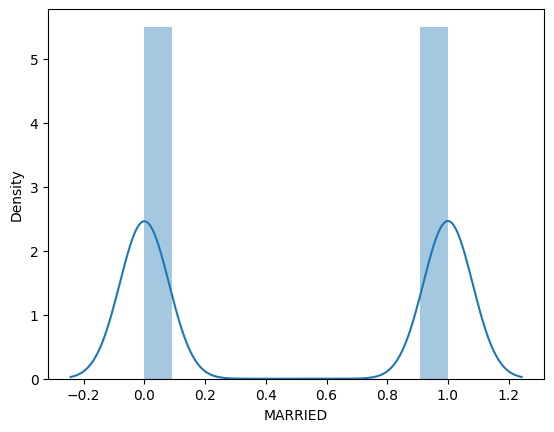


Column :- CHILDREN


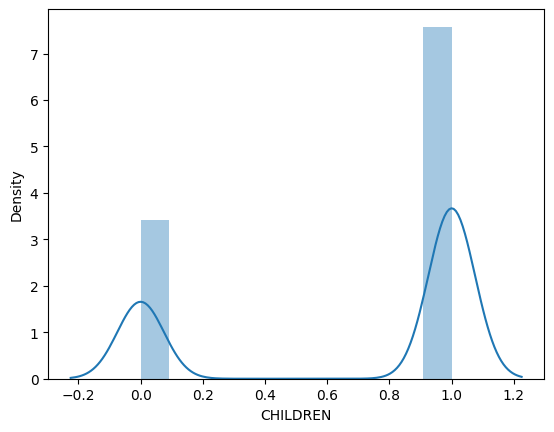


Column :- ANNUAL_MILEAGE


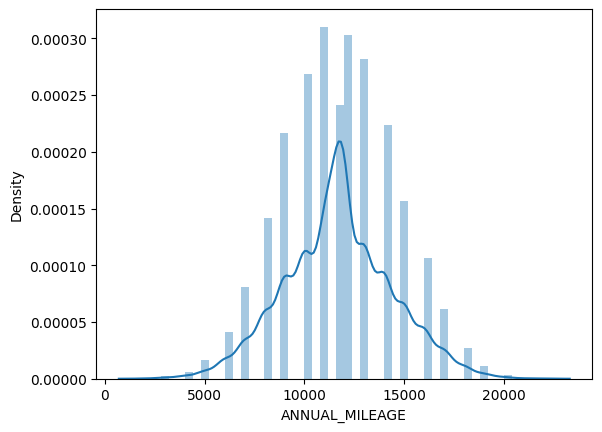


Column :- SPEEDING_VIOLATIONS


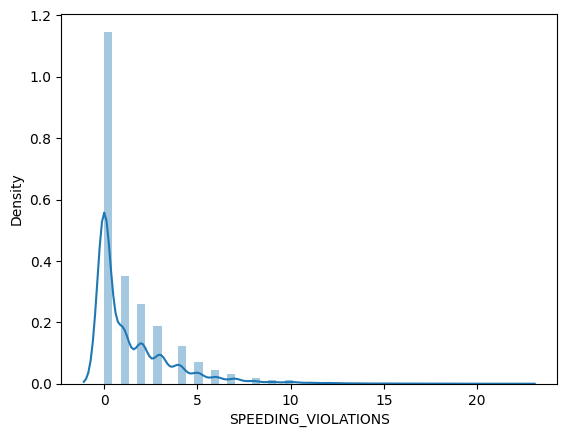


Column :- DUIS


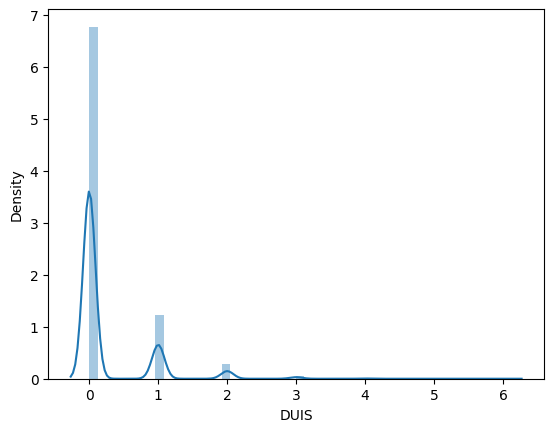


Column :- PAST_ACCIDENTS


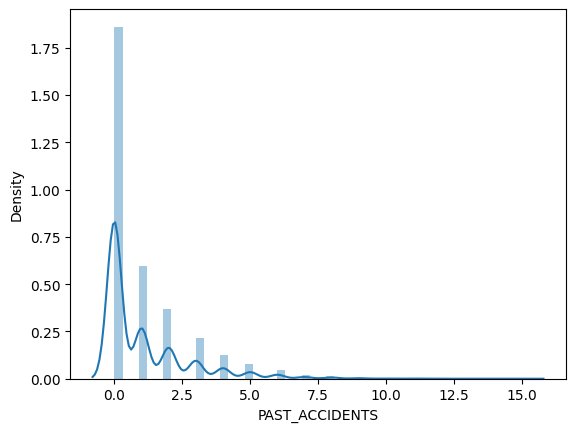


Column :- OUTCOME


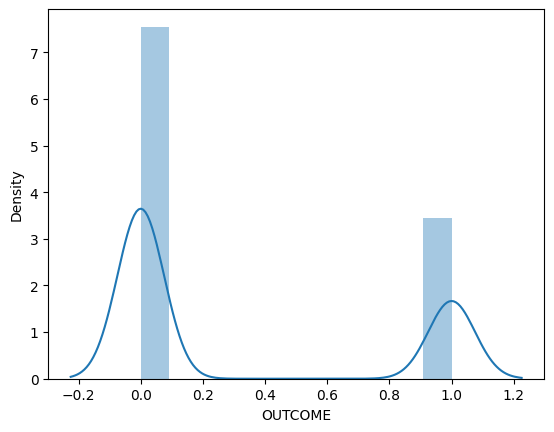

In [25]:
for l in num_var:
  print("Column :-",l)
  sb.distplot(df[l])
  mpl.show()
  print("")

<Axes: >

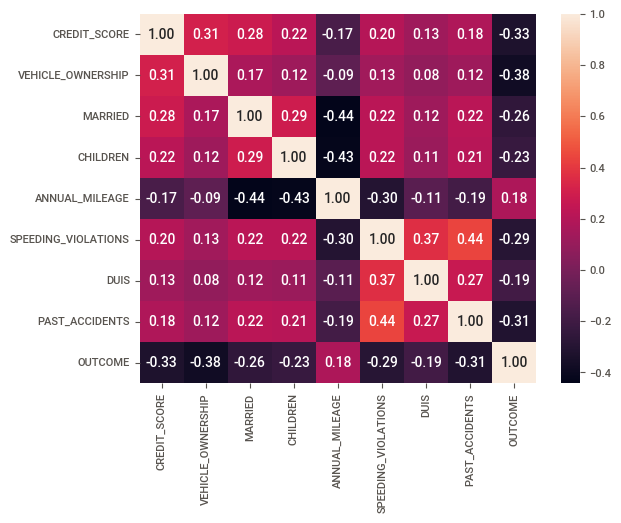

In [104]:
sb.heatmap(df.corr(),annot = True,fmt = '.2f')

In [26]:
from sklearn.model_selection import train_test_split
X = df.drop("OUTCOME",axis = 1)
y = df['OUTCOME']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)
X_train.shape,X_test.shape

((6312, 16), (2706, 16))

In [27]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [28]:
tarnsformer = ColumnTransformer(transformers = [
    ("C1",OrdinalEncoder(categories=[['16-25', '26-39', '40-64','65+']]),['AGE']),
    ("C2",OneHotEncoder(drop = "first"),['GENDER']),
    ("C3",OneHotEncoder(drop = "first"),['RACE']),
    ("C4",OrdinalEncoder(categories=[['0-9y', '10-19y', '20-29y', '30y+']]),['DRIVING_EXPERIENCE']),
    ("C5",OrdinalEncoder(categories=[['none', 'high school', 'university']]),['EDUCATION']),
    ("C6",OrdinalEncoder(categories=[['poverty', 'middle class', 'working class','upper class']]),['INCOME']),
    ("C7",StandardScaler(),["CREDIT_SCORE"]),
    ("C8",StandardScaler(),["VEHICLE_OWNERSHIP"]),
    ("C9",OneHotEncoder(drop = "first"),['VEHICLE_YEAR']),
    ("C10",StandardScaler(),["ANNUAL_MILEAGE"]),
    ("C11",OneHotEncoder(drop = "first"),['VEHICLE_TYPE']),
    ("C12",StandardScaler(),["SPEEDING_VIOLATIONS"]),
    ("C13",StandardScaler(),["DUIS"]),
    ("C14",StandardScaler(),["PAST_ACCIDENTS"]),
],remainder="passthrough")

In [29]:
X_train_tfm = tarnsformer.fit_transform(X_train)
X_test_tfm = tarnsformer.fit_transform(X_test)

In [30]:
X_train_tfm

array([[ 0.        ,  0.        ,  0.        , ..., -0.65014778,
         0.        ,  0.        ],
       [ 1.        ,  1.        ,  0.        , ..., -0.65014778,
         0.        ,  0.        ],
       [ 1.        ,  1.        ,  0.        , ...,  1.78855838,
         1.        ,  1.        ],
       ...,
       [ 2.        ,  0.        ,  0.        , ...,  0.5692053 ,
         1.        ,  1.        ],
       [ 2.        ,  0.        ,  0.        , ..., -0.65014778,
         0.        ,  1.        ],
       [ 2.        ,  1.        ,  0.        , ...,  1.78855838,
         1.        ,  1.        ]])

In [31]:
df["OUTCOME"].value_counts()

0    6189
1    2829
Name: OUTCOME, dtype: int64

In [32]:
from imblearn.combine import SMOTETomek
samp = SMOTETomek()
X_train_samp,y_train_samp = samp.fit_resample(X_train_tfm,y_train)

In [33]:
y_train_samp.value_counts()

1    4218
0    4218
Name: OUTCOME, dtype: int64

## **AUTO EDA**

In [34]:
!pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 24.6 MB/s eta 0:00:00


In [35]:
import sweetviz as sv
report = sv.analyze(df)

                                             |          | [  0%]   00:00 -> (? left)

In [36]:
report.show_html("/content/viz.html")

Report /content/viz.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [37]:
!pip install pandas_profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.0/353.0 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 10.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 49.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 38.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 63.4 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=a6b062917a73a049a0911db5ae6c530e797540942022a1f7985c9116a2628203
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: wordcloud
    Found existing installation: wordcloud 1.8.2.2
    Uninstalling wordc

In [38]:
from pandas_profiling import ProfileReport

In [39]:
report1 = ProfileReport(df,title = "Dashboard",explorative = True)

In [40]:
# report1.to_widgets()

In [41]:
report1.to_file("/content/report1.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## **PCA**

In [105]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 10)
X_train_new = pca.fit_transform(X_train_samp)
X_test_new = pca.fit_transform(X_test_tfm)

In [106]:
X_train_new

array([[-3.28475182,  0.65396249,  0.86905569, ...,  0.22469221,
         0.4309594 , -0.28784234],
       [-0.68543426,  0.48742288,  0.15608748, ...,  0.50838391,
        -0.62035296,  0.34370904],
       [ 0.8832209 ,  0.12976171, -0.36266086, ...,  1.76501701,
        -0.43402459,  0.51649949],
       ...,
       [ 1.38449963, -1.78002857, -2.49978204, ..., -0.25989772,
        -0.38209084, -0.19911054],
       [-3.31711188,  1.10125845,  0.02236961, ..., -0.34699652,
         0.32542169,  0.39999366],
       [-1.807229  ,  1.58311564,  0.5662748 , ..., -0.17639425,
        -0.54120101,  0.53052736]])

In [108]:
X_train_new = pd.DataFrame(X_train_new,columns = ['p1','p2','p3','p4','p5','p6','p7','p8','p9','p10',])
X_test_new = pd.DataFrame(X_test_new,columns = ['p1','p2','p3','p4','p5','p6','p7','p8','p9','p10',])

<Axes: >

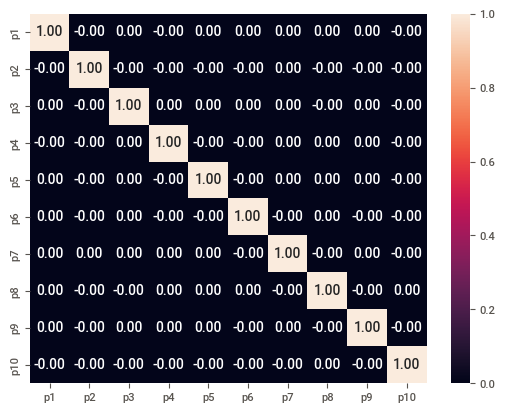

In [109]:
sb.heatmap(X_train_new.corr(),annot = True,fmt = '.2f')

## **LOGISTIC REGRESSION**

In [42]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor_model = lor.fit(X_train_samp,y_train_samp)
lor_model

LogisticRegression()

In [43]:
lor_y_pred = lor_model.predict(X_test_tfm)
lor_y_pred

array([1, 1, 0, ..., 1, 0, 0])

In [44]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve

In [45]:
accuracy_score(y_test,lor_y_pred)

0.8122690317812269

In [46]:
def CM(actual,predict):
  cm = confusion_matrix(actual,predict)
  con_mat = sb.heatmap(cm,annot = True,fmt = ".2f",xticklabels=["Yes","No"],yticklabels=["Yes","No"])
  mpl.xlabel("Predicted")
  mpl.ylabel("Actual")
  mpl.title("Confusion Matrix")
  mpl.show()
  return con_mat

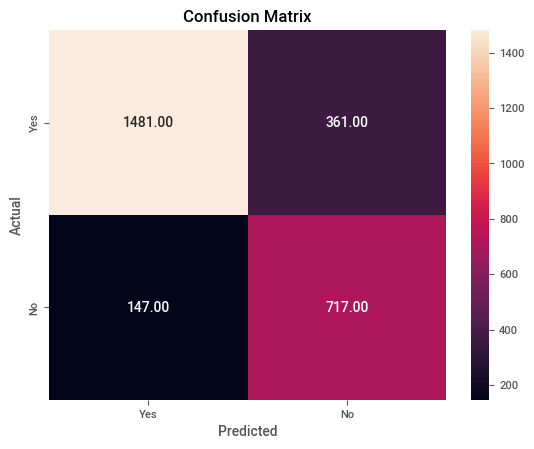

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted', ylabel='Actual'>

In [47]:
CM(y_test,lor_y_pred)

In [48]:
def roc(actual,pred):
  fpr,tpr,threshold = roc_curve(actual,pred,drop_intermediate = False)
  roc_plot = mpl.plot(fpr,tpr)
  mpl.title("ROC CURVE")
  mpl.xlabel("False Possitive Rate")
  mpl.ylabel("True Possitive Rate")
  mpl.show()
  return roc_plot

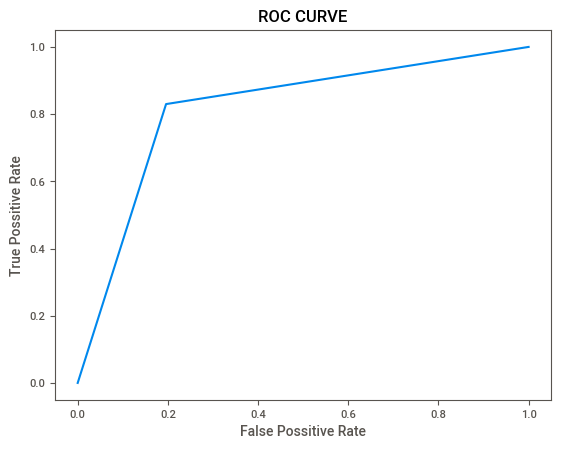

In [49]:
roc(y_test,lor_y_pred)

In [50]:
print(classification_report(y_test,lor_y_pred))

              precision    recall  f1-score   support

           0       0.91      0.80      0.85      1842
           1       0.67      0.83      0.74       864

    accuracy                           0.81      2706
   macro avg       0.79      0.82      0.80      2706
weighted avg       0.83      0.81      0.82      2706



## **Decision Tree**

In [51]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = "gini",min_samples_split = 20,max_depth=5)
dt_model = dt.fit(X_train_samp,y_train_samp)
dt_model

DecisionTreeClassifier(max_depth=5, min_samples_split=20)

In [52]:
dt_y_pred = dt_model.predict(X_test_tfm)
dt_y_pred

array([1, 1, 0, ..., 1, 0, 0])

In [53]:
accuracy_score(y_test,dt_y_pred)

0.8259423503325942

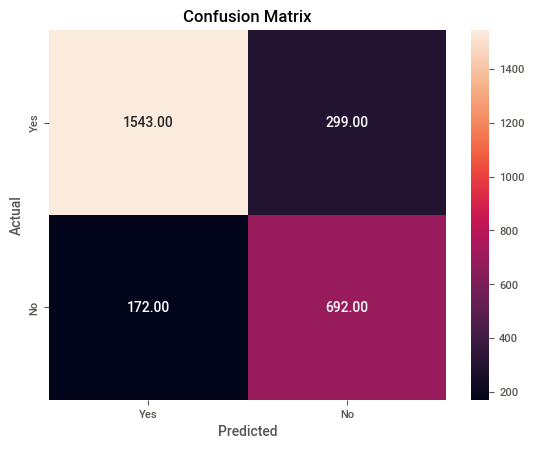

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted', ylabel='Actual'>

In [54]:
CM(y_test,dt_y_pred)

In [55]:
print(classification_report(y_test,dt_y_pred))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87      1842
           1       0.70      0.80      0.75       864

    accuracy                           0.83      2706
   macro avg       0.80      0.82      0.81      2706
weighted avg       0.84      0.83      0.83      2706



Hyperparameter tunning

In [110]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
param = [{
    "criterion":["gini","entropy"],
    "min_samples_split":range(7,30),
    "max_depth":range(3,10)
}]
dt_rs = RandomizedSearchCV(DecisionTreeClassifier(),param,cv = 10,scoring = "accuracy")

In [57]:
dt_rs.fit(X_train_samp,y_train_samp)

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(),
                   param_distributions=[{'criterion': ['gini', 'entropy'],
                                         'max_depth': range(3, 10),
                                         'min_samples_split': range(7, 30)}],
                   scoring='accuracy')

In [58]:
dt_rs.best_params_

{'min_samples_split': 28, 'max_depth': 9, 'criterion': 'entropy'}

In [59]:
dt_rs.best_score_

0.8612029369269086

In [112]:
gs_dt = GridSearchCV(DecisionTreeClassifier(),param,cv = 10,scoring = "accuracy")

In [113]:
gs_dt.fit(X_train_samp,y_train_samp)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(3, 10),
                          'min_samples_split': range(7, 30)}],
             scoring='accuracy')

In [115]:
gs_dt.best_params_

{'criterion': 'entropy', 'max_depth': 9, 'min_samples_split': 22}

In [116]:
gs_dt.best_score_

0.8609656890028278

## **Random Forest**

In [60]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200,criterion = "gini",min_samples_split = 25,max_depth=7)
rf_model = rf.fit(X_train_samp,y_train_samp)
rf_model

RandomForestClassifier(max_depth=7, min_samples_split=25, n_estimators=200)

In [61]:
rf_y_pred = rf_model.predict(X_test_tfm)
rf_y_pred

array([1, 1, 0, ..., 1, 0, 0])

In [62]:
accuracy_score(y_test,rf_y_pred)

0.819660014781966

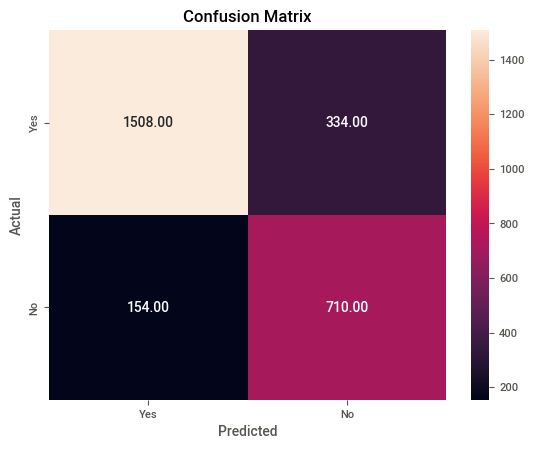

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted', ylabel='Actual'>

In [63]:
CM(y_test,rf_y_pred)

In [64]:
print(classification_report(y_test,rf_y_pred))

              precision    recall  f1-score   support

           0       0.91      0.82      0.86      1842
           1       0.68      0.82      0.74       864

    accuracy                           0.82      2706
   macro avg       0.79      0.82      0.80      2706
weighted avg       0.83      0.82      0.82      2706



In [65]:
params_rf = [{
    "n_estimators":[50,100,150,200,250,300],
    "criterion":["gini","entropy"],
    "min_samples_split":range(7,30),
    "max_depth":range(3,10)
}]
rf_rs = RandomizedSearchCV(RandomForestClassifier(),params_rf,cv = 10,scoring = "accuracy")

In [66]:
rf_rs.fit(X_train_samp,y_train_samp)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(),
                   param_distributions=[{'criterion': ['gini', 'entropy'],
                                         'max_depth': range(3, 10),
                                         'min_samples_split': range(7, 30),
                                         'n_estimators': [50, 100, 150, 200,
                                                          250, 300]}],
                   scoring='accuracy')

In [67]:
rf_rs.best_params_

{'n_estimators': 250,
 'min_samples_split': 12,
 'max_depth': 9,
 'criterion': 'gini'}

In [68]:
rf_rs.best_score_

0.8768501964885059

In [68]:
# gs_rf = GridSearchCV(RandomForestClassifier(),params_rf,cv = 10,scoring = "accuracy")

In [ ]:
# gs_rf.best_params_

In [ ]:
# gs_rf.best_score_

## **SVM**

In [69]:
from sklearn.svm import SVC
svc = SVC(kernel = "rbf")

In [70]:
svc_model = svc.fit(X_train_samp,y_train_samp)
svc_model

SVC()

In [71]:
svc_y_pred = svc_model.predict(X_test_tfm)
svc_y_pred

array([1, 1, 0, ..., 1, 0, 0])

In [72]:
accuracy_score(y_test,svc_y_pred)

0.8270509977827051

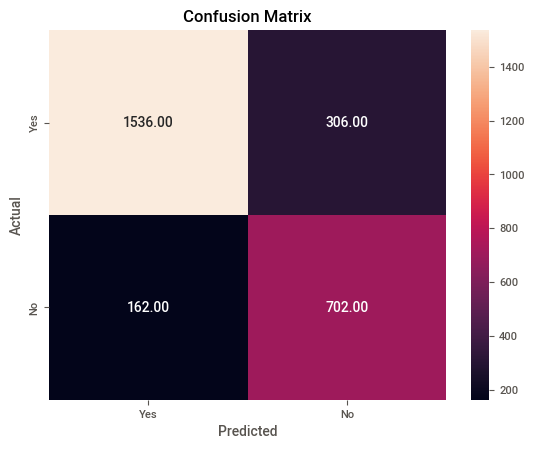

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted', ylabel='Actual'>

In [73]:
CM(y_test,svc_y_pred)

In [74]:
print(classification_report(y_test,svc_y_pred))

              precision    recall  f1-score   support

           0       0.90      0.83      0.87      1842
           1       0.70      0.81      0.75       864

    accuracy                           0.83      2706
   macro avg       0.80      0.82      0.81      2706
weighted avg       0.84      0.83      0.83      2706



## **KNN**

In [75]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train_samp,y_train_samp)
knn_model

KNeighborsClassifier()

In [76]:
knn_y_pred = knn_model.predict(X_test_tfm)
knn_y_pred

array([1, 1, 0, ..., 1, 0, 1])

In [77]:
accuracy_score(y_test,knn_y_pred)

0.7664449371766445

In [78]:
print(classification_report(y_test,knn_y_pred))

              precision    recall  f1-score   support

           0       0.89      0.75      0.81      1842
           1       0.60      0.81      0.69       864

    accuracy                           0.77      2706
   macro avg       0.75      0.78      0.75      2706
weighted avg       0.80      0.77      0.77      2706



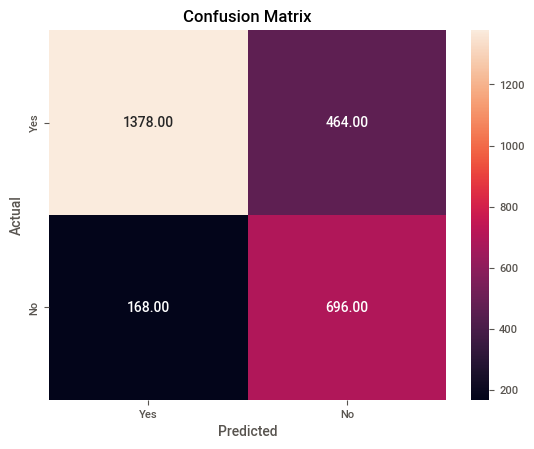

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted', ylabel='Actual'>

In [79]:
CM(y_test,knn_y_pred)

## **ADA Boost**

In [80]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=100)
abc_model = abc.fit(X_train_samp,y_train_samp)
abc_model

AdaBoostClassifier(n_estimators=100)

In [81]:
abc_y_pred = abc_model.predict(X_test_tfm)
abc_y_pred

array([1, 1, 0, ..., 1, 0, 0])

In [82]:
accuracy_score(y_test,abc_y_pred)

0.7605321507760532

In [83]:
print(classification_report(y_test,abc_y_pred))

              precision    recall  f1-score   support

           0       0.93      0.70      0.80      1842
           1       0.58      0.89      0.70       864

    accuracy                           0.76      2706
   macro avg       0.76      0.79      0.75      2706
weighted avg       0.82      0.76      0.77      2706



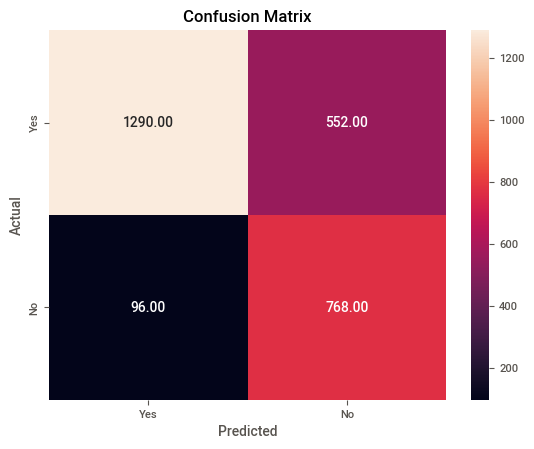

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted', ylabel='Actual'>

In [84]:
CM(y_test,abc_y_pred)

## **GradientBoost**

In [85]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc_model = gbc.fit(X_train_samp,y_train_samp)
gbc_model

GradientBoostingClassifier()

In [86]:
gbc_y_pred = gbc_model.predict(X_test_tfm)
gbc_y_pred

array([1, 1, 0, ..., 1, 0, 0])

In [87]:
accuracy_score(y_test,gbc_y_pred)

0.7354028085735402

In [88]:
print(classification_report(y_test,gbc_y_pred))

              precision    recall  f1-score   support

           0       0.94      0.66      0.77      1842
           1       0.55      0.91      0.69       864

    accuracy                           0.74      2706
   macro avg       0.74      0.78      0.73      2706
weighted avg       0.81      0.74      0.74      2706



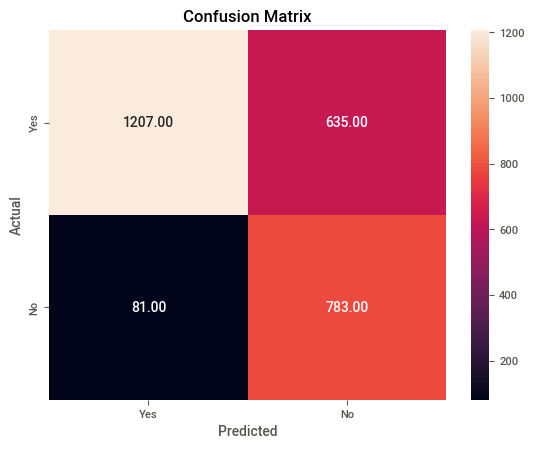

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted', ylabel='Actual'>

In [89]:
CM(y_test,gbc_y_pred)

## **XG Boost**

In [90]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb_model = xgb.fit(X_train_samp,y_train_samp)
xgb_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [91]:
xgb_y_pred = xgb_model.predict(X_test_tfm)
xgb_y_pred

array([1, 1, 0, ..., 1, 0, 0])

In [92]:
accuracy_score(y_test,xgb_y_pred)

0.6271249076127124

In [93]:
print(classification_report(y_test,xgb_y_pred))

              precision    recall  f1-score   support

           0       0.95      0.48      0.63      1842
           1       0.46      0.95      0.62       864

    accuracy                           0.63      2706
   macro avg       0.71      0.71      0.63      2706
weighted avg       0.79      0.63      0.63      2706



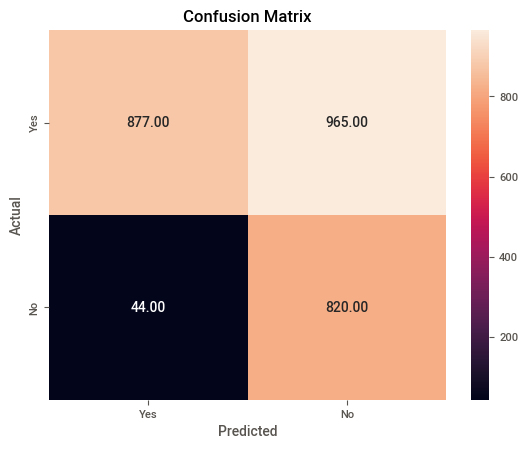

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted', ylabel='Actual'>

In [94]:
CM(y_test,xgb_y_pred)

## **Neural Network**

In [95]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential,regularizers
from keras.layers import *
from keras.callbacks import EarlyStopping

In [96]:
callback = EarlyStopping(
    monitor = "val_loss",
    patience = 10,
    min_delta = 0.0001,
    mode = "auto"
)

In [97]:
model = Sequential()

In [98]:
model.add(Dense(32,activation = "relu",input_dim = 16,
                kernel_initializer="he_normal",kernel_regularizer=regularizers.L1(0.02)))
model.add(Dense(32,activation = "relu",kernel_initializer="he_normal",kernel_regularizer=regularizers.L1(0.02)))
model.add(Dense(32,activation = "relu",kernel_initializer="he_normal",kernel_regularizer=regularizers.L1(0.02)))
model.add(Dense(32,activation = "relu",kernel_initializer="he_normal",kernel_regularizer=regularizers.L1(0.02)))
model.add(Dense(32,activation = "relu",kernel_initializer="he_normal",kernel_regularizer=regularizers.L1(0.02)))
model.add(Dense(32,activation = "relu",kernel_initializer="he_normal",kernel_regularizer=regularizers.L1(0.02)))
model.add(Dense(128,activation = "relu",kernel_initializer="he_normal",kernel_regularizer=regularizers.L1(0.02)))
model.add(Dropout(0.3))
model.add(Dense(1,activation = "sigmoid"))

In [99]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                544       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 32)                1056      
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 dense_5 (Dense)             (None, 32)                1056      
                                                                 
 dense_6 (Dense)             (None, 128)               4

In [100]:
model.compile(optimizer = "Adam",loss = "binary_crossentropy",metrics = "accuracy")

In [101]:
history = model.fit(X_train_samp,y_train_samp,epochs = 100,callbacks = callback,batch_size = 32,validation_data = (X_test_tfm,y_test))

Epoch 1/100
264/264 [==============================] - 4s 5ms/step - loss: 23.0152 - accuracy: 0.7432 - val_loss: 9.5305 - val_accuracy: 0.7975
Epoch 2/100
264/264 [==============================] - 1s 3ms/step - loss: 4.2259 - accuracy: 0.7760 - val_loss: 1.3745 - val_accuracy: 0.7971
Epoch 3/100
264/264 [==============================] - 1s 3ms/step - loss: 1.0133 - accuracy: 0.7840 - val_loss: 0.8828 - val_accuracy: 0.7849
Epoch 4/100
264/264 [==============================] - 1s 3ms/step - loss: 0.8199 - accuracy: 0.7941 - val_loss: 0.7882 - val_accuracy: 0.7964
Epoch 5/100
264/264 [==============================] - 1s 3ms/step - loss: 0.7884 - accuracy: 0.8003 - val_loss: 0.8029 - val_accuracy: 0.7853
Epoch 6/100
264/264 [==============================] - 1s 3ms/step - loss: 0.7646 - accuracy: 0.8093 - val_loss: 0.7656 - val_accuracy: 0.8001
Epoch 7/100
264/264 [==============================] - 1s 3ms/step - loss: 0.7513 - accuracy: 0.8093 - val_loss: 0.7582 - val_accuracy: 0.797

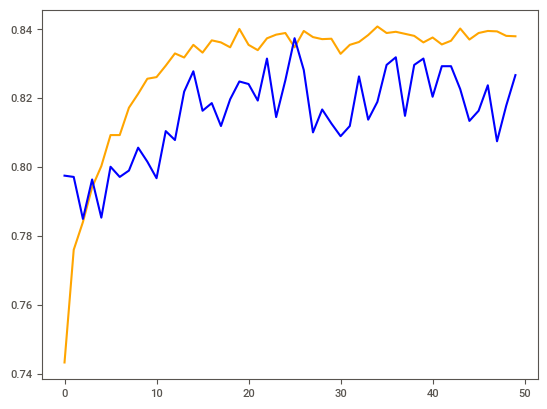

In [102]:
mpl.plot(history.history['accuracy'],color = "orange")
mpl.plot(history.history['val_accuracy'],color = "blue")
mpl.show()

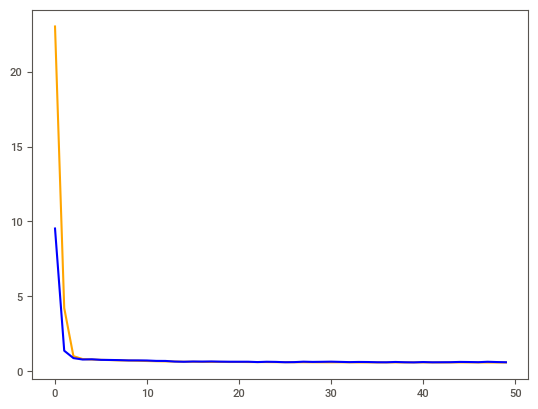

In [103]:
mpl.plot(history.history['loss'],color = "orange")
mpl.plot(history.history['val_loss'],color = "blue")
mpl.show()

## **AUTOML**

In [117]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 71.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 73.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 66.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 92.3 MB/s eta 0:

In [119]:
import pycaret

In [120]:
from pycaret.classification import setup

In [121]:
model_set = setup(df,target = 'OUTCOME')

,Description,Value
0,Session id,2693
1,Target,OUTCOME
2,Target type,Binary
3,Original data shape,"(9018, 17)"
4,Transformed data shape,"(9018, 28)"
5,Transformed train set shape,"(6312, 28)"
6,Transformed test set shape,"(2706, 28)"
7,Ordinal features,4
8,Numeric features,8
9,Categorical features,8


In [125]:
from pycaret.classification import compare_models
model = model_set.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8382,0.8996,0.7192,0.7544,0.7358,0.6194,0.6203,1.4770
ada,Ada Boost Classifier,0.8338,0.8968,0.7045,0.7505,0.7264,0.6073,0.6082,0.7530
lda,Linear Discriminant Analysis,0.8311,0.8929,0.7015,0.7458,0.7226,0.6014,0.6023,0.6150
lightgbm,Light Gradient Boosting Machine,0.8302,0.8894,0.7061,0.7409,0.7226,0.6004,0.6012,0.6940
ridge,Ridge Classifier,0.8283,0.0000,0.6808,0.7498,0.7131,0.5910,0.5929,0.3540
xgboost,Extreme Gradient Boosting,0.8191,0.8788,0.6778,0.7275,0.7014,0.5719,0.5729,1.3690
rf,Random Forest Classifier,0.8169,0.8784,0.6566,0.7329,0.6921,0.5624,0.5645,1.6960
lr,Logistic Regression,0.8121,0.8600,0.6646,0.7159,0.6891,0.5548,0.5558,1.4700
et,Extra Trees Classifier,0.8067,0.8613,0.6455,0.7133,0.6770,0.5396,0.5416,1.5930
knn,K Neighbors Classifier,0.7925,0.8300,0.6429,0.6796,0.6603,0.5111,0.5119,0.8620


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [126]:
from pycaret.classification import *
best_model = finalize_model(model)

In [127]:
best_model

Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['CREDIT_SCORE',
                                             'VEHICLE_OWNERSHIP', 'MARRIED',
                                             'CHILDREN', 'ANNUAL_MILEAGE',
                                             'SPEEDING_VIOLATIONS', 'DUIS',
                                             'PAST_ACCIDENTS'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values...
                                            criterion='friedman_mse', init=None,
                                            learning_rate=0.1, loss='log_loss',
                                            max_depth=3, max_features=None,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=100,
                                            n_iter_no_change=None,
                                            random_state=2693, subsample=1.0,
                                            tol=0.0001, validation_fraction=0.1,
                                            verbose=0, warm_start=False))],
         verbose=False)